<a href="https://colab.research.google.com/github/calosos/py_resumenes_codigos/blob/main/C6_CH_Preprocesamiento_De_Daos_Regresipn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import iqr
from matplotlib import pyplot as plt

#PROCESAMIENTO DE DATOS & INTRODUCCIÓN AL ANÁLISIS PREDICTIVO CON REGRESIÓN

###Objetivos


1.   Conceptos de procedamiento de datos
1.   Identificar y tratar outliers
2.   Importancia de Graficar Datos
2.   Introducción al análisis de datos ausentes
2.   Incopororar las componentes principales




#Preprocesamiento de datos

Los datos no suelen estar preparados para ser analizados o para ser entrada de algoritmos
Exixste una sere de actividades que ayudan a pullir los datos de entrada

##Detección y Tratamiento de Outliers

> Bloc con sangría


outliers = cuando los valores están muy alejados de la masa de datos central, los denominamos valores anómalos
Se pueden ver en el driadrama de caja 


In [28]:
lista  = pd.Series([2, 19, 25, 31,32 , 36 ,38,42, 45, 47,84])

In [35]:
lista.median()
mediana = lista.median()
lista_q1 = pd.Series([x for x in lista if x<=mediana])
q1 =lista_q1.median()
lista_q2 = pd.Series( [x for x in lista if x>=mediana])
q2=lista_q2.median()

print (q1,q2)

28.0 43.5


El IQR o rango intecuartilico representa la parte de la caja , grosor de la caja de bigotes

In [37]:
IQR = q2-q1
IQR

15.5

Para calcular los bigotes se  tomar el IQR *(1.5)

In [39]:
bigotes = IQR*1.5
bigotes

23.25

In [41]:
bigote_izquiedo = q1 - bigotes
bigote_derecho = q2 + bigotes
print(bigote_izquiedo, bigote_derecho)

4.75 66.75


Más hata del rangp 4.75 y 66.75 son outliers, por ejemplo el 2 y el  84

In [26]:
lista.describe()

count    11.000000
mean     37.363636
std      20.031339
min       2.000000
25%      31.500000
50%      36.000000
75%      43.500000
max      84.000000
dtype: float64

In [43]:
iqr(lista)

15.5

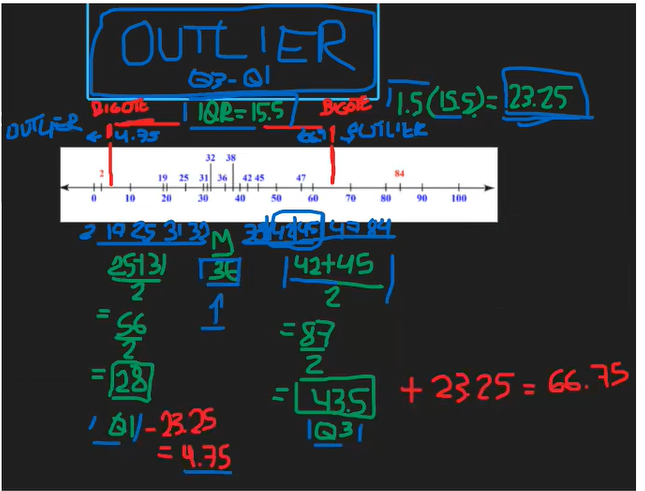

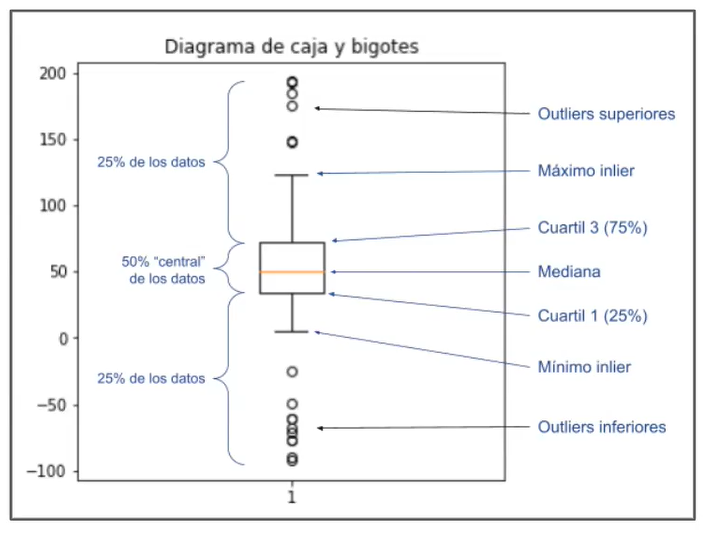

(-1.0, 1.0)

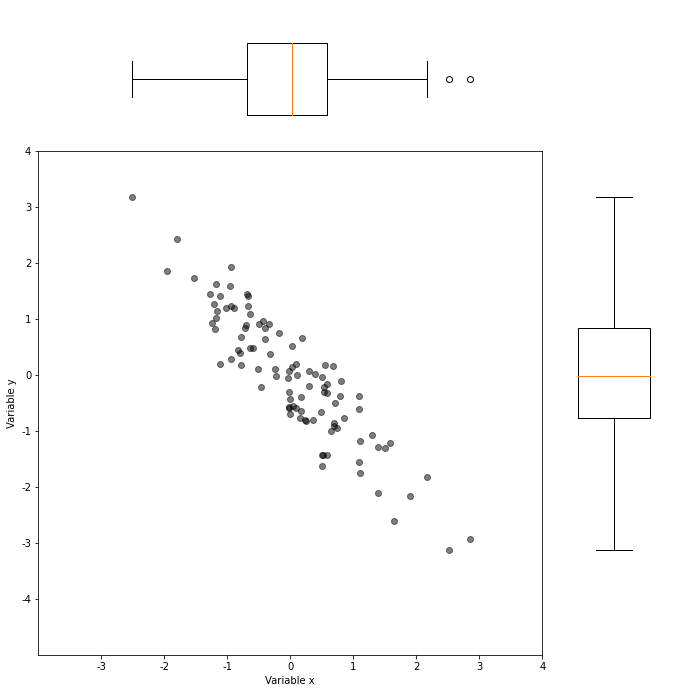

In [47]:
plt.rcParams["figure.figsize"] = (10,10)


np.random.seed(153)

x_data = np.random.randn(100)
y_data = -x_data + np.random.randn(100)*0.5

df = pd.DataFrame()
df['vcnt'] = x_data
df['ecnt'] = y_data


left = 0.1
bottom = 0.1
top = 0.8
right = 0.8
main_ax = plt.axes([left,bottom,right-left,top-bottom])
# create axes to the top and right of the main axes and hide them
top_ax = plt.axes([left,top,right - left,1-top])
plt.axis('off')
right_ax = plt.axes([right,bottom,1-right,top-bottom])
plt.axis('off')
main_ax.plot(df['vcnt'],  df['ecnt'], 'ko', alpha=0.5)
# Save the default tick positions, so we can reset them..

tcksx = main_ax.get_xticks()
tcksy = main_ax.get_yticks()

right_ax.boxplot(df['ecnt'], positions=[0], notch=False, widths=1.)
top_ax.boxplot(df['vcnt'], positions=[0], vert=False, notch=False, widths=1.)

main_ax.set_yticks(tcksy) # pos = tcksy
main_ax.set_xticks(tcksx) # pos = tcksx
main_ax.set_yticklabels([int(j) for j in tcksy])
main_ax.set_xticklabels([int(j) for j in tcksx])
main_ax.set_ylim([min(tcksy-1),max(tcksy)])
main_ax.set_xlim([min(tcksx-1),max(tcksx)])
main_ax.set_xlabel('Variable x')
main_ax.set_ylabel('Variable y')


# set the limits to the box axes
top_ax.set_xlim(main_ax.get_xlim())
top_ax.set_ylim(-1,1)
right_ax.set_ylim(main_ax.get_ylim())
right_ax.set_xlim(-1,1)

##Datos Ausentes


Operaciones vectorizadas que ofreccen funciones que descartan los valotes NaN
nansum,  nanprod, nanmean
si se quira una observación podemos usar dropna() , fillNna esta más recomendado 

##Analisis de Componentes principales  PCA principal component  analysis